In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Adding Year to the file
monthly = pd.read_csv("Bus_monthly(weekday,weekend,total).csv")
monthly['year'] = pd.DatetimeIndex(monthly['Month_Beginning']).year
# Adding Month to the file
monthly['month'] = pd.DatetimeIndex(monthly['Month_Beginning']).month
#Leap year Adjustment
for i in range(0, len(monthly.index)):
    if((monthly.at[i,'month'] == 2) & (monthly.at[i,'year']  in ([2000, 2004, 2008, 2012, 2016, 2020]))):
        monthly.at[i,'MonthTotal'] = (monthly.at[i,'MonthTotal'] * 365)/366

In [3]:
# Grouping by route 
route_group = monthly.groupby(['route'],as_index=False).count()
# For All the routes which ran all the months of 19 years
route_group = route_group.loc[route_group.routename == 228]
# List of All such groups
route_groups = route_group['route'].tolist()
# DF with only such routes
monthly_reg = monthly.loc[monthly['route'].isin(route_groups)]
# All regular routes grouped by route and year
group_route_year = monthly_reg.groupby(['route','year'],as_index = False).mean()
#Normalizing all the Average Rides with respect to 2001
normalized_avg = group_route_year
for i in range (0,103):
    j = i*19
    avg_2001 = normalized_avg.at[j,'Avg_Weekday_Rides']
    for k in range (j, j+19):
        if(normalized_avg.at[k,'Avg_Weekday_Rides']>avg_2001):
            normalized_avg.at[k,'Avg_Weekday_Rides'] = normalized_avg.at[k,'Avg_Weekday_Rides']/avg_2001
        else:
            normalized_avg.at[k,'Avg_Weekday_Rides'] = avg_2001/normalized_avg.at[k,'Avg_Weekday_Rides']
for i in range(0,103):
    j = i*19
    for k in range(j, j+19):
        normalized_avg.at[k,'Avg_Weekday_Rides'] = (1-normalized_avg.at[k,'Avg_Weekday_Rides'])*(1-normalized_avg.at[k,'Avg_Weekday_Rides'])
max5 = []
max_of_all = []
for j in range(0,103):
    k = j*19
    max_local = 0
    for l in range(k, k+19):
        a = normalized_avg.at[l,'Avg_Weekday_Rides']
        if(a>max_local):
            max_local = a
    max_of_all.append(max_local)
max_of_all2 = max_of_all.copy()
for i in range(0,10):
    max_of5 = 0
    for m in range(0,len(max_of_all)):
        if(max_of_all[m]>max_of5):
            max_of5 = max_of_all[m]
    max_of_all.remove(max_of5)
    max5.append(max_of5)
indexes = []
for i in range(0,len(max5)):
    indexes.append(max_of_all2.index(max5[i]))
route_list = [route_groups[i] for i in indexes]
display(route_list) #All the regular routes with most drastic change in descending order of drasticity

['169', '1', '51', '2', '108', '171', '11', '28', '120', '100']

7.209120829161296

Text(-75, 50, 'Polar Vertex')

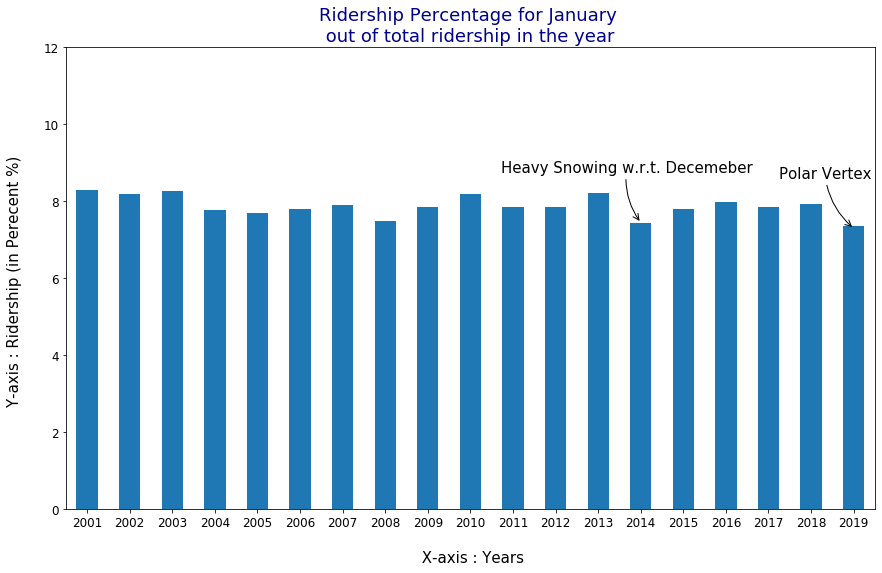

In [4]:
#Finding Trend for Polar Vertex
import seaborn as sns
#Selecting for the month of January
winter_df = monthly.loc[(monthly.month == 1)]
year_df = monthly.groupby(['year'],as_index = False).sum()
#Grouping Based on Year and then Month
winter_df = winter_df.groupby(['year','month'],as_index = False).sum()
# Finding Share of month of January out of Total Ridership in the year
winter_df['percentage_share'] =  winter_df.MonthTotal*100/year_df.MonthTotal
jan_1819 = winter_df.loc[(winter_df.year == 2018) | (winter_df.year == 2019)]
diff = (jan_1819.at[17,'percentage_share'] - jan_1819.at[18,'percentage_share'])*100/jan_1819.at[17,'percentage_share']
display(diff) #Difference between percentage share of JAN 2018 and JAN 2019 (Polar Vertex)
ax = winter_df.plot.bar(x = 'year',y='percentage_share',legend = False)
fig = plt.gcf()
plt.xticks(fontsize =12,rotation='horizontal')
plt.yticks(fontsize = 12)
fig.set_size_inches(14.5, 8.5)
fig.savefig('test1png.png', dpi=100)
plt.ylim(0,12)
plt.title('Ridership Percentage for January \n out of total ridership in the year ',loc='center',fontsize = 18,color = 'darkblue')
plt.xlabel('\n X-axis : Years', fontsize =15)
plt.ylabel('Y-axis : Ridership (in Perecent %) \n ', fontsize =15)
plt.annotate("Heavy Snowing w.r.t. Decemeber",(13,7.45),clip_on=True,textcoords="offset points",xytext=(-140,+50),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2",color = 'black'),fontsize=15)
plt.annotate("Polar Vertex",(18,7.3),textcoords="offset points",xytext=(-75,+50),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2",color = 'black'),fontsize=15)

Text(-200, -40, 'Heavy Downtown \n Road Construction')

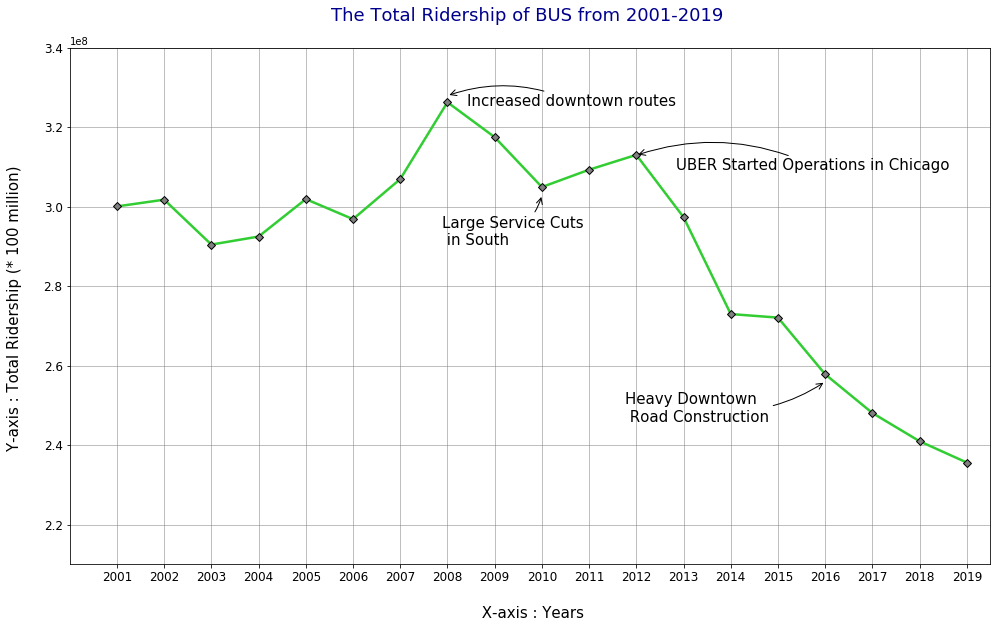

In [6]:
year_df = monthly.groupby(['year'],as_index = False).sum()
ax = year_df.plot.line(x='year',y = 'MonthTotal',linewidth=2.5, marker = 'D',color = 'limegreen',mec = 'black',mfc = 'gray',legend = False)
fig = plt.gcf()
x = year_df.year
plt.xticks(x,fontsize =12)
plt.yticks(fontsize = 12)
fig.set_size_inches(16.5, 9.5)
fig.savefig('test2png.png', dpi=100)
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.xlim(2000,2019.5)
plt.ylim(210000000,340000000)
plt.title('The Total Ridership of BUS from 2001-2019 \n ',loc='center',fontsize = 18,color = 'darkblue')
plt.xlabel('\n X-axis : Years', fontsize =15)
plt.ylabel('Y-axis : Total Ridership (* 100 million) \n ', fontsize =15)
plt.annotate("Increased downtown routes",(2008,328000000),textcoords="offset points",xytext=(+20,-10),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),fontsize=15)
plt.annotate("Large Service Cuts \n in South",(2010,303000000),textcoords="offset points",xytext=(-100,-50),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),fontsize=15)
plt.annotate("UBER Started Operations in Chicago",(2012,313000000),textcoords="offset points",xytext=(+40,-15),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),fontsize=15)
plt.annotate("Heavy Downtown \n Road Construction",(2016,256000000),textcoords="offset points",xytext=(-200,-40),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),fontsize=15)

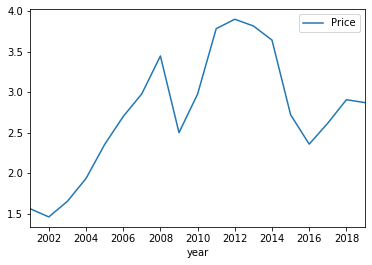

In [5]:
#variation of GAS price in Chicago over the years
gas = pd.read_csv('gas.csv')
gas['year'] = pd.DatetimeIndex(gas['Date']).year
gas = gas.loc[~gas.year.isin([2000,2020])]
gas.reset_index(inplace = True, drop = True)
gas = gas.groupby(['year'],as_index = False).mean()
ax = gas.plot.line(x='year',y='Price')

0.09493865538035208

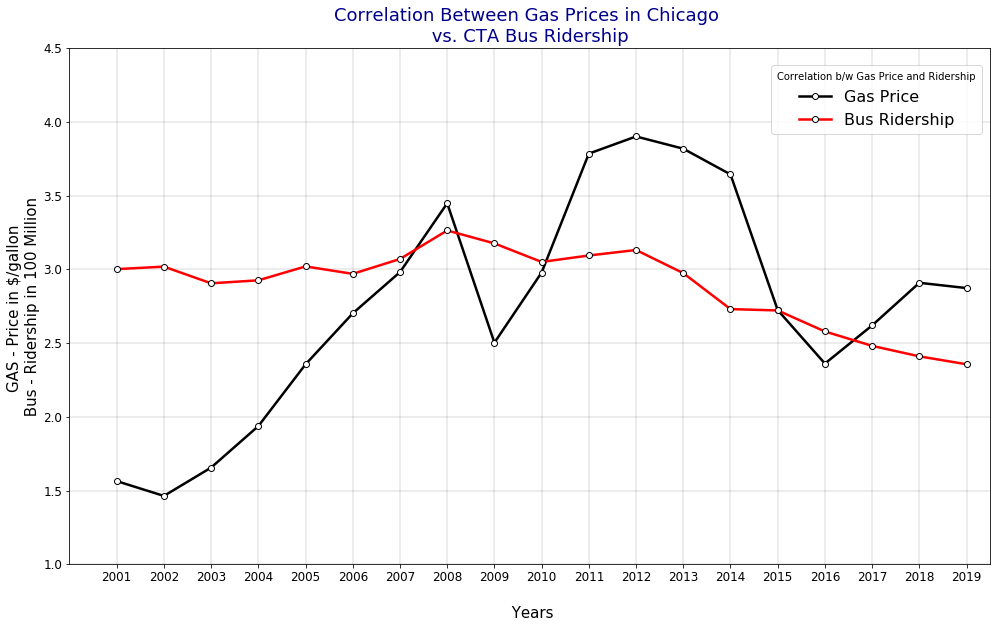

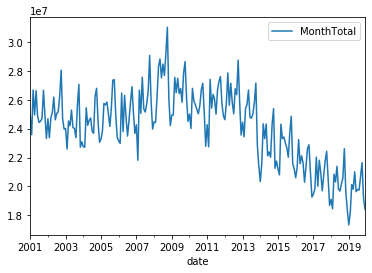

In [6]:
#Co-relation of GAS prices and Ridreship
a = year_df.MonthTotal
b = gas.Price
c = a.corr(b)
display(c)

ax = gas.plot.line(x = 'year',y = 'Price' ,linewidth=2.5, marker = 'o',color = 'black',mfc = 'white')
year_df['MonthTotal1'] = year_df.MonthTotal/100000000
year_df.plot.line(x='year',y = 'MonthTotal1',ax = ax,linewidth=2.5, marker = 'o',color = 'red',mec = 'black',mfc = 'white')
fig = plt.gcf()
x = year_df.year
plt.xticks(x,fontsize =12)
plt.yticks(fontsize = 12)
fig.set_size_inches(16.5, 9.5)
fig.savefig('test2png.png', dpi=100)
plt.xlim(2000,2019.5)
plt.ylim(1,4.5)
plt.grid(color='gray', linestyle='-', linewidth=.3)
plt.legend(loc= 'center right',title = "Correlation b/w Gas Price and Ridership",labels = ['Gas Price','Bus Ridership'],bbox_to_anchor=(1, .9),fontsize = 16)
plt.title('Correlation Between Gas Prices in Chicago \n vs. CTA Bus Ridership ',loc='center',fontsize = 18,color = 'darkblue')
plt.xlabel('\n Years', fontsize =15)
plt.ylabel('GAS - Price in $/gallon \n Bus - Ridership in 100 Million ', fontsize =15)
plt.show()
month_sum = monthly.groupby(['year','month'],as_index= False).sum()
month_sum['date'] = pd.to_datetime(month_sum[['year', 'month']].assign(DAY=1))

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.7511016974740673


Using TensorFlow backend.
/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
203/203 [==============================] - 3s 14ms/step - loss: 0.0984
Epoch 2/100
203/203 [==============================] - 1s 7ms/step - loss: 0.0753
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0577
Epoch 4/100
203/203 [==============================] - 1s 7ms/step - loss: 0.0466
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0390
Epoch 6/100
203/203 [==============================] - 1s 7ms/step - loss: 0.0334
Epoch 7/100
203/203 [==============================] - 1s 7ms/step - loss: 0.0296
Epoch 8/100
203/203 [==============================] - 2s 9ms/step - loss: 0.0270
Epoch 9/100
203/203 [==============================] - 1s 7ms/step - loss: 0.0251
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0238
Epoch 11/100
203/203 [==============================] - 1s 7ms/step - loss: 0.0228
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0220
Epoch 13/100

203/203 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 100/100
203/203 [==============================] - 1s 5ms/step - loss: 0.0083


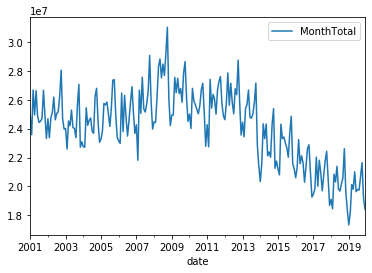

In [7]:
#Supervised Machine Learning to predcit the ridership over the years using Long Short-term Memory (LSTM)

month_sum = monthly.groupby(['year','month'],as_index= False).sum()
month_sum['date'] = pd.to_datetime(month_sum[['year', 'month']].assign(DAY=1))
ax = month_sum.plot.line(x = 'date',y='MonthTotal')
month_sum['prev'] = month_sum['MonthTotal'].shift(1)
month_sum = month_sum.dropna()
month_sum['diff'] = month_sum['MonthTotal'] - month_sum['prev']
# ax = month_sum.plot.line(x = 'date',y='diff')
month_sum_spr = month_sum.drop(['prev','year','month','Avg_Weekday_Rides','Avg_Saturday_Rides','Avg_Sunday-Holiday_Rides'],axis=1)
for inc in range(1,19):
    field_name = 'lag_' + str(inc)
    month_sum_spr[field_name] = month_sum_spr['diff'].shift(inc)
month_sum_spr = month_sum_spr.dropna().reset_index(drop=True)
import statsmodels.formula.api as smf
model = smf.ols(formula='diff ~ lag_1 + lag_2 + lag_3 + lag_4+ lag_5 + lag_6 + lag_7 + lag_8 + lag_9 + lag_10 + lag_11 + lag_12 + lag_13 + lag_14 + lag_15 + lag_16 + lag_17  ', data=month_sum_spr)
model_fit = model.fit()
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)
from sklearn.preprocessing import MinMaxScaler
df_model = month_sum_spr.drop(['MonthTotal','date'],axis=1)
train_set, test_set = df_model[0:-6].values, df_model[-6:].values
#apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)

In [15]:
y_pred = model.predict(X_test,batch_size=1)

In [16]:
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])
pred_test_set = []
for index in range(0,len(y_pred)):
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

In [17]:
result_list = []
sales_dates = list(month_sum[-7:].date)
act_sales = list(month_sum[-7:].MonthTotal)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)
display(df_result)

,pred_value,date
0,20653392,2019-07-01
1,19459090,2019-08-01
2,20511377,2019-09-01
3,22320734,2019-10-01
4,18819073,2019-11-01
5,18860468,2019-12-01


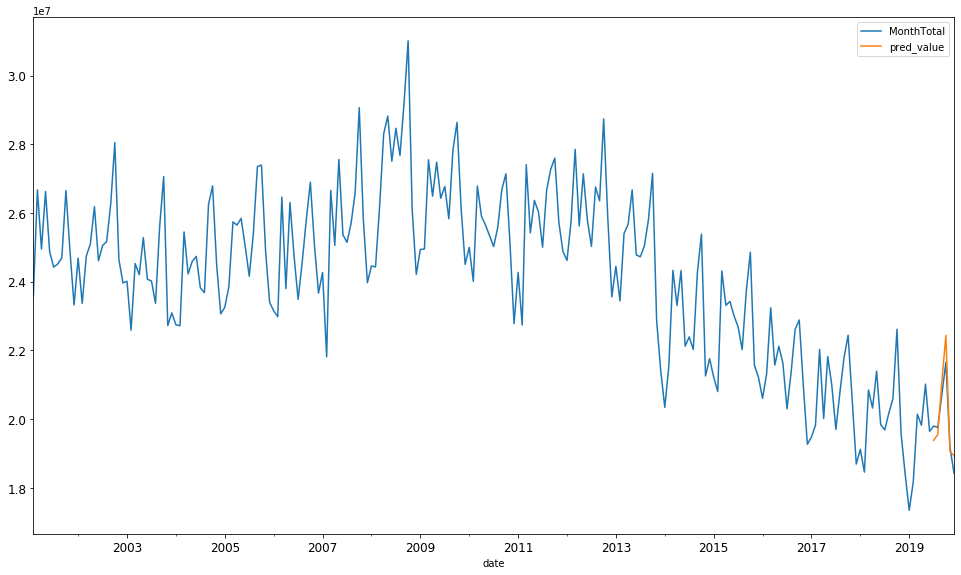

In [11]:
df_pred = pd.merge(month_sum,df_result,on='date',how='left')
ax = df_pred.plot.line(x = 'date',y=['MonthTotal','pred_value'])
fig = plt.gcf()
plt.xticks(fontsize =12)
plt.yticks(fontsize = 12)
fig.set_size_inches(16.5, 9.5)
fig.savefig('test2png.png', dpi=100)